In [1]:
import numpy as np
import pandas as pd
import os, pickle
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import metrics
import sklearn.preprocessing as preprocessing

import sklearn.linear_model as lm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV



from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
warnings.filterwarnings("ignore")


Number of Rows: 1044
Number of Columns: 33
-The column 'age', has values that goes from '15' to '22' and is 'int64' type.

-The column 'Medu', has values that goes from '0' to '4' and is 'int64' type.

-The column 'Fedu', has values that goes from '0' to '4' and is 'int64' type.

-The column 'traveltime', has values that goes from '1' to '4' and is 'int64' type.

-The column 'studytime', has values that goes from '1' to '4' and is 'int64' type.

-The column 'failures', has values that goes from '0' to '3' and is 'int64' type.

-The column 'famrel', has values that goes from '1' to '5' and is 'int64' type.

-The column 'freetime', has values that goes from '1' to '5' and is 'int64' type.

-The column 'goout', has values that goes from '1' to '5' and is 'int64' type.

-The column 'Dalc', has values that goes from '1' to '5' and is 'int64' type.

-The column 'Walc', has values that goes from '1' to '5' and is 'int64' type.

-The column 'health', has values that goes from '1' to '5' and is

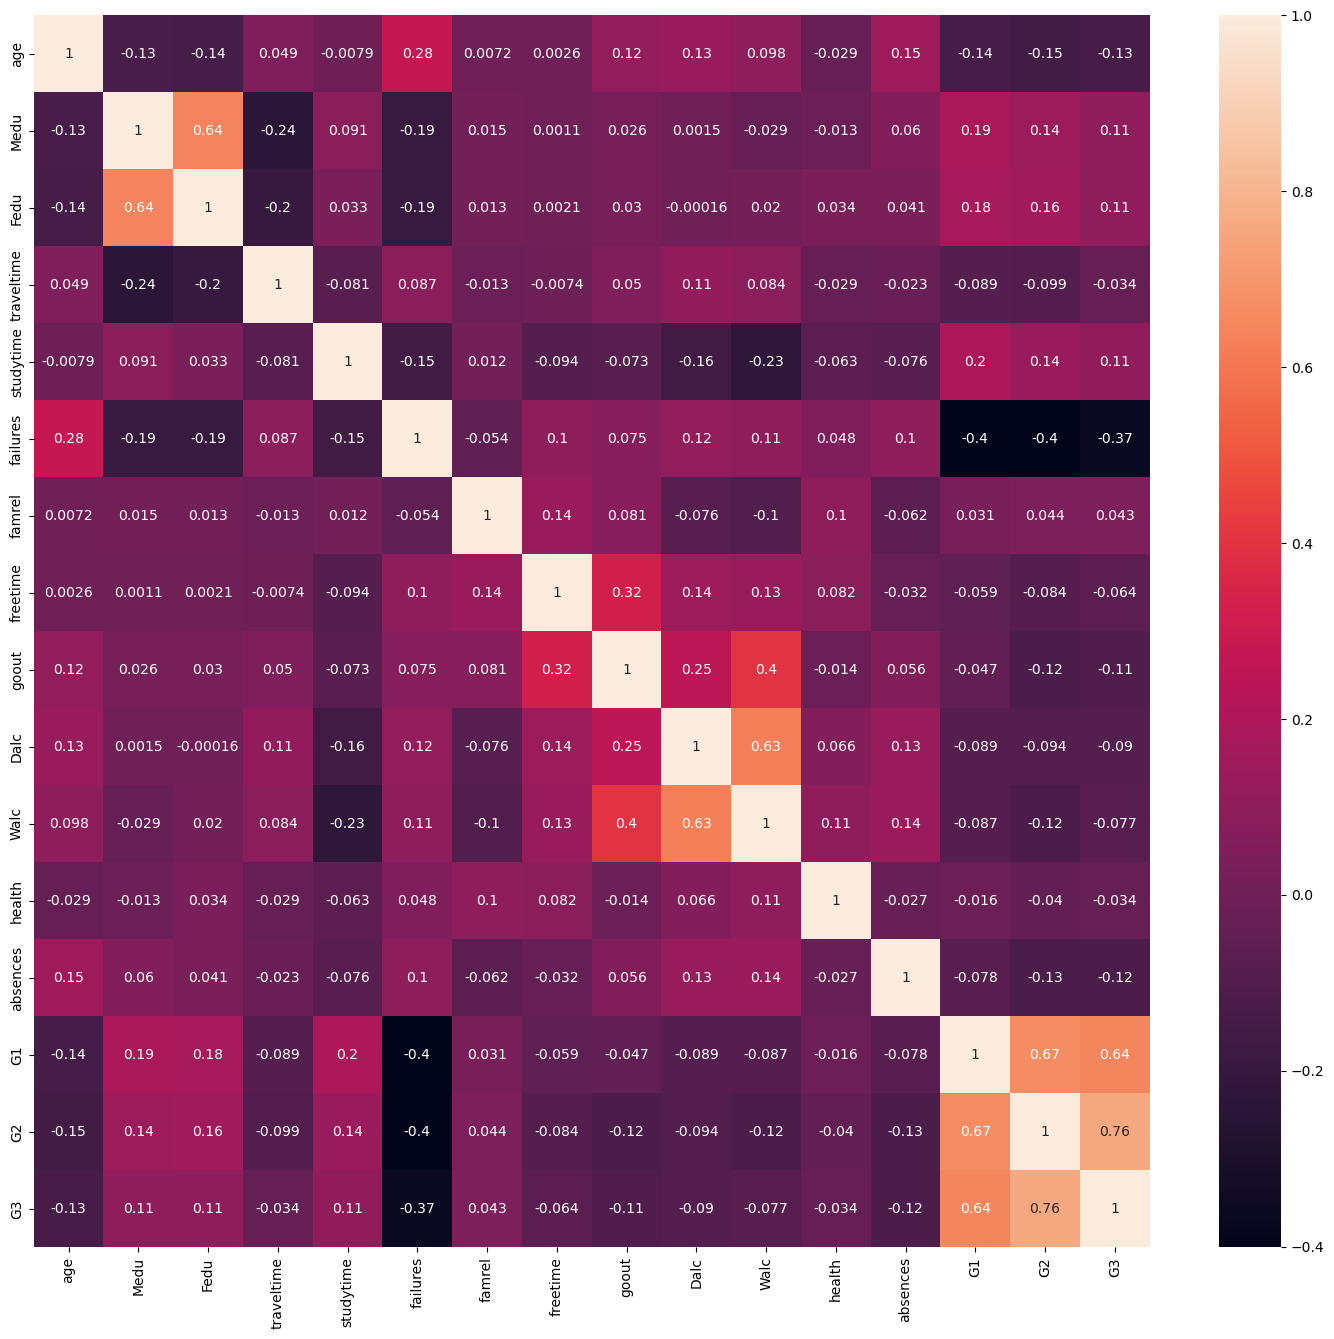

[]
vif : [1.9963317936276241, 2.4319105320371572, 4.717823870083055, 1.5950703649275944, 9.825874706854913, 2.0953145047923383, 3.5718681559244607, 3.0162080554427053, 2.8724448303761143, 1.884555926897023, 10.93187454734676, 5.973977524402291, 2.414753703091177, 1.766159054074913, 1.3700611426523859, 1.8579900195082468, 4.558225720164818, 1.637047438424896, 1.2567185770871394, 2.913534581875414, 1.430176487936342, 2.215524694733618, 5.361834840968895, 14.179523878749118, 5.895936587754666, 1.7311457358498, 83.61498917664406, 17.371883013831425, 11.85580777023538, 6.573274140091771, 8.360750884869702, 1.7044043435195515, 20.679475292760674, 12.855579846100024, 12.261406305984766, 6.860039931941392, 9.048411145600648, 8.032683722946965, 1.7968719169211471, 7.156679561642408, 7.103682125965953]
dropping age at index 26
vif : [1.8329913197832755, 2.4285849204720305, 4.472009336573366, 1.5803966818848032, 8.967180344861209, 2.0927589867858796, 3.5511380882493415, 3.015799787704836, 2.86381

In [100]:
class DataPreparation:
    def __init__(self, outcome, features=None, categorical_features=None, one_hot_encoder=None):
        self._outcome = outcome
        self._features = features
        self._categorical_features = categorical_features
        self._one_hot_encoder = one_hot_encoder
 
    def get_data(self, path, separator):
        data = pd.read_csv(path, sep = separator)
        if self._features:
            data = data[self._features]
        return data
    
    def replace_values(self,colunas, data, tipo):
        if tipo == 'Binary':
            for coluna in colunas:
                coluna = data[coluna]
                for index in range (len(coluna)):
                    if coluna[index] >= 10:
                        coluna[index] = 1
                    else:
                        coluna[index] = 0
        elif tipo == 'FiveLevels':
            for coluna in colunas:
                coluna = data[coluna]
                for index in range (len(coluna)):
                    if coluna[index] <= 9:
                        coluna[index] = 5
                    elif coluna[index] >= 10 and coluna[index] <= 11 :
                        coluna[index] = 4
                    elif coluna[index] >= 12 and coluna[index] <= 13 :
                        coluna[index] = 3
                    elif coluna[index] >= 14 and coluna[index] <= 15 :
                        coluna[index] = 2
                    else:
                        coluna[index] = 1
        return data
    
    def get_data_info(self,data):
        print("Number of Rows: {}\nNumber of Columns: {}".format(data.shape[0], data.shape[1]))
        return data.describe()
        
    def get_null_feature(self,data):
        return(data.isnull().sum())
    
    def get_outliers_feature(self,data):
        red_circle = dict(markerfacecolor='red', marker='o')
        for column in data:
            plt.figure()
            data.boxplot([column],vert=False,grid = False,flierprops=red_circle)
        return plt.show()
        
    def get_features_types(self,data):
        return(data.dtypes)
        
    def get_cathegorical_features(self,data):
        features = data.columns
        numeric_features = data._get_numeric_data().columns
        for column in data[numeric_features][:-2]:
            print("-The column '{}', has values that goes from '{}' to '{}' and is '{}' type.\n"
            .format(column, data[column].min(), data[column].max(), data[column].dtype))
            
        list_cathegorical_features = list(set(features) - set(numeric_features))
        for column in data[list_cathegorical_features][:-2]:
            print("-The column '{}' is a categorical column with values from '{}' to '{}' and is {} type"
          .format(column, data[column].min(), data[column].max(), data[column].dtype))
            
        return list_cathegorical_features
    
    def get_features_description(self,data, label):
        for col in data.columns:
            if col != label:
                data[col].describe()
    
    def correlation_matrix(self,data):
        plt.figure(figsize=(18,16))
        sns.heatmap(data.corr(),annot=True)
        plt.show()
        
    def vif(self,data,label):
        thresh = 10
        independent_variables = []
        print(independent_variables)
        for col in data.columns:
            if col != label:
                independent_variables.append(col)
        for i in np.arange(0, len(data)):
            vif = [variance_inflation_factor(data[independent_variables].values,ix)
                for ix in range(data[independent_variables].shape[1])]
            maxloc = vif.index(max(vif))
            if max(vif) > thresh:
                print('vif :', vif)
                print('dropping', data[independent_variables].columns[maxloc],
                      'at index', maxloc)
                del independent_variables[maxloc]
            else:
                break

        print('Final variables :',independent_variables)
        return independent_variables
    
    def one_hot_encoding(self, data):
        if self._categorical_features:
            categorial = data[self._categorical_features]
        else:
            categorical = data.select_dtypes(exclude=np.number)
            categorical_features = categorical.columns
        if self._one_hot_encoder:
            one_hot_encoder = self._one_hot_encoder
        else:
            one_hot_encoder = preprocessing.OneHotEncoder(
                sparse=False,
                drop='first')
        categorical = one_hot_encoder.fit_transform(categorical)
        categorical_columns = one_hot_encoder.get_feature_names_out(categorical_features)
        categorical = pd.DataFrame(categorical, columns=categorical_columns)
        continuous = data.select_dtypes(include=np.number)
        data = pd.concat([categorical, continuous], axis=1)
        return data, one_hot_encoder
    
    def normalize_data(self,data,label):
        numeric_features = data.loc[:, data.columns != label].select_dtypes(include=np.number).columns.tolist()
        
        sc = preprocessing.StandardScaler()
        sc.fit(data[numeric_features])
        data[numeric_features] = sc.transform(data[numeric_features])
        return data
    
    def split_data(self, data, independent_variables, size_test):
        x, y = data[independent_variables], data.iloc[:, [-1]]
        X_train , X_test , y_train , y_test = train_test_split(x, y, test_size = size_test, random_state = 2017)
        return X_train, X_test, y_train, y_test
    
    def fit(self, X_train, y_train, algorithm):
        model = algorithm.fit(X_train, y_train)
        return model
    
    def predict(self, model, X_test):
        result = np.round(model.predict(X_test))
        return result
    
    def model_metrics(self,model, X_test, y_test, y_test_pred):
        print('Train MAE : ',metrics.mean_absolute_error(y_test,y_test_pred))
        print('Train RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
        print('R- Squared = ',metrics.r2_score (y_test, y_test_pred))
        print("The MAE of the Model is:", metrics.mean_absolute_error(y_test, y_test_pred))
        print("Accuracy: ", metrics.accuracy_score(y_test, y_test_pred))
        print ('Test confusion matrix \n', metrics.confusion_matrix (y_test, y_test_pred))
        print ('Classification report : \n',metrics.classification_report(y_test,y_test_pred))

if __name__ == '__main__':
    path1 = 'student-mat.csv'
    path2 = 'student-por.csv'
    model_instance = DataPreparation(outcome = 'yes', features=None, categorical_features=None, one_hot_encoder=None)
    data_math = model_instance.get_data(path1, separator = ';')
    data_por = model_instance.get_data(path2, separator = ';')
    data = pd.concat([data_math, data_por],ignore_index=True )
    data = model_instance.replace_values(['G1','G2','G3'], data, tipo = 'Binary')
    info_data = model_instance.get_data_info(data)
    null = model_instance.get_null_feature(data) 
    cathegorical = model_instance.get_cathegorical_features(data)
    #model_instance.get_outliers_feature(data)
    correl_matriz = model_instance.correlation_matrix(data)
    #data = model_insdtance.normalize_data(data,'G3')
    data, one_hot = model_instance.one_hot_encoding(data)
    independent_variables = model_instance.vif(data,'G3')
    X_train, X_test, y_train, y_test = model_instance.split_data(data, independent_variables, size_test = 0.3)

In [7]:
class SupervisedMlModels:
    def __init__(self, x_train=None, x_test=None, y_train=None, y_test=None):
        self._x_train = x_train
        self._x_test = x_test
        self._y_train = y_train
        self._y_test = y_test
        
    def hyperparameter_tuning(self, model):
        if model == 'LinearRegression':
            grid = lm.LinearRegression()
        elif model == 'Svm':
            param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
            grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
        elif model == 'RandomForest':
            param_grid = {
                'bootstrap': [True],
                'max_depth': [80, 90, 100, 110],
                'max_features': [2, 3],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [8, 10, 12],
                'n_estimators': [100, 200, 300, 1000]
            }
            grid = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, 
                                      cv = 3, n_jobs = -1, verbose = 2)
        elif model == 'DecisionTree':
            params = {
                'max_depth': [2, 3, 5, 10, 20],
                'min_samples_leaf': [5, 10, 20, 50, 100],
                'criterion': ["gini", "entropy"]
            }
            grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                                       param_grid=params, 
                                       cv=10, n_jobs=-1, verbose=1, scoring = "accuracy")
        elif model == 'NearestNeighbour':
            k_range = list(range(1, 31))
            param_grid = dict(n_neighbors=k_range)

            grid = GridSearchCV(KNeighborsClassifier(), param_grid, 
                                cv=10, scoring='accuracy', return_train_score=False,verbose=1)
        elif model == 'NaiveBayes':
            grid = MultinomialNB();
        else:
            grid = 0
        return grid
            
        
 
    def fit(self, x_train, y_train, algorithm):
        model = algorithm.fit(x_train, y_train)
        return model
    
    def predict(self, model, x_test):
        result = np.round(model.predict(x_test))
        return result
    
    def model_metrics(self,model, X_test, y_test, y_test_pred):
        print('Train MAE : ',metrics.mean_absolute_error(y_test,y_test_pred))
        print('Train RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
        print('R- Squared = ',metrics.r2_score (y_test, y_test_pred))
        print("The MAE of the Model is:", metrics.mean_absolute_error(y_test, y_test_pred))
        print("Accuracy: ", metrics.accuracy_score(y_test, y_test_pred))

if __name__ == '__main__':
    model_ml = SupervisedMlModels(x_train=None, x_test=None, y_train=None, y_test = None)
    algorithms = ['LinearRegression','DecisionTree','Svm','RandomForest','NearestNeighbour','NaiveBayes']
    for algorithm in algorithms:
        model = model_ml.hyperparameter_tuning(algorithm)
        if model != 0:
            print('O algoritmo escolhido foi',algorithm)
            model_ml.fit(X_train, y_train, model)
            pickle.dump(model_ml,open('model.pkl','wb'))
            y_test_pred = model_ml.predict(model,X_test)
            model_ml.model_metrics(model,X_test,y_test, y_test_pred)
        else:
            print("O seguinte modelo não existe")
    

O algoritmo escolhido foi LinearRegression


NameError: name 'X_train' is not defined

In [2]:
pickle.dump(model,open('model.pkl','wb'))

NameError: name 'model' is not defined

In [5]:
model_svm = pickle.load(open('Svm.pkl', 'rb'))  # loading the model

In [6]:
prediction = model_svm.predict([[1, 1,15, 1,1,1,3,3,
        1,0, 0, 0, 0,
        0,1, 0, 0, 0,
        1,0,0,0,
        1,0,0,3,3,0,1,1,1,
        1,1,1,1,1,3,3,1,1,
        1,1,20,20]])

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.